# introduction to machine learning
## pca analysis on MNIST dataset

داخل درس با آنالیز مولفه های اصلی آشنا شده اید ، در این تمرین قصد داریم از ابتدا این روش را روی دیتاست داده شده عملی کنیم و نتیایج این روش را با همدیگر مشاهده کنیم.

In [1]:
first_name= "borna"
last_name= "khodabandeh"
student_number= "400109898"

در بخش زیر تمامی کتابخانه هایی که لازم دارید را ایمپورت کنید.

In [2]:
import numpy as np
import pandas as pd

### داده شده را لود کنید MNIST در این قسمت دیتا ست  

پیش از این که مولفه های اصلی داده ها را استخراج کنید آن را نرمالایز کنید.
توجه کنید که سمپل های لود شده به صورت 28*28  میباشند و باید آن را به صورت بردار 784 تایی تبدیل کنید

In [3]:
#load the data set and fill nan value with 0
# reshape to 784 array instead of 28*28
# TODO (load dataset)
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Replace NaN values with 0 (there are typically no NaN values in the MNIST dataset)
x_train = np.nan_to_num(x_train, nan=0)
x_test = np.nan_to_num(x_test, nan=0)

# Reshape the images to 784 array
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

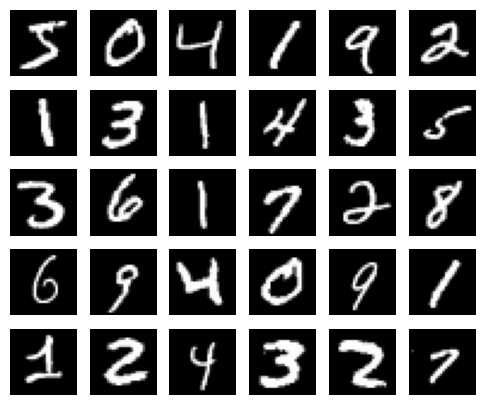

In [4]:
import matplotlib.pyplot as plt

def show_images(num_images, X):
    if num_images == 1:
        plt.imshow(X[0].reshape(28, 28), cmap='gray')
        plt.axis('off')
    elif num_images <= 5:
        fig, axes = plt.subplots(1, num_images, figsize=(num_images, 1))
        for i in range(num_images):
            ax = axes[i]
            ax.imshow(X[i].reshape(28, 28), cmap='gray')
            ax.axis('off')
    else:
        num_rows = 5
        num_cols = (num_images // num_rows) + 1 if num_images % num_rows != 0 else num_images // num_rows
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols, num_rows))
        for i in range(num_images):
            ax = axes[i // num_cols, i % num_cols]
            ax.imshow(X[i].reshape(28, 28), cmap='gray')
            ax.axis('off')
    plt.show()


show_images(30, x_train)


In [5]:
#TODO scale the data set to [0 1]
#divide data to maximum value .
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

در این قسمت ابتدا تابع کواریانس داده را بدست آورید و سپس مقادیر ویژه و بردار ویژه های آن را استخراج کنید.

In [6]:
#TODO calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix.

# Calculate the covariance matrix
cov_matrix = np.cov(x_train, rowvar=False)

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

در بخش زیر میخواهیم تعدادی از مولفه های اصلی را استخراج کنیم که بخش قابل قبولی از واریانس داده ها را شامل شده باشند.

In [7]:
explained_variance = 0.5 # you can change this variable to get more component of datasets.
#calculate the total variance from eigenvalues and find the first k component that contains the explained_variance of the total variance.
#TODO

# Calculate the total variance from eigenvalues
total_variance = sum(eigenvalues)

# Find the number of components needed to explain 'explained_variance' of the total variance
k = 0
cumulative_variance = 0
for i in range(len(eigenvalues)):
    cumulative_variance += eigenvalues[i] / total_variance
    k += 1
    if cumulative_variance >= explained_variance:
        break

# Calculate the compression ratio
compression_ratio = x_train.shape[1] / k

print(f"Needed components for {explained_variance = } : ", k)
print("Compression ratio: ", compression_ratio)

Needed components for explained_variance = 0.5 :  11
Compression ratio:  71.27272727272727


حال در این بخش دیتاهای موجود را روی این مولفه ها تصویر کنید عملیات کاهش بعدد را انجام دهید و سپس ابعاد را به اندازه تصاویر اصلی برگردانید و  تصویر یکی از سمپل ها را برای هر دو حالت قبل از کاهش بعد روی مولفه ها و بعد از آن رسم کنید.

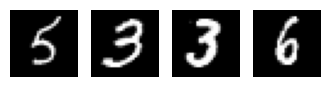

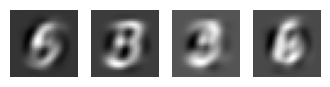

In [8]:
#Project Images into Reduced Dimensionality Eigenbasis F=X*V (X is our dataset,F our reduced dimensionality dataset,V is k choosen eigenvectors)
#And Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose (V_transpose is equal to V inverse)
#select on sample and reshape it to a 28 by 28 matrix and plot them as image

# Project Images into Reduced Dimensionality Eigenbasis F=X*V
X_reduced = x_train @ eigenvectors[:, :k]

# Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose
X_original_reconstructed = X_reduced @ eigenvectors[:, :k].T

# Select one sample (e.g., the first sample) and reshape it to a 28 by 28 matrix
sample_index = np.random.choice(x_train.shape[0], size=15)
sample_original = x_train[sample_index]
sample_reconstructed = X_original_reconstructed[sample_index]
sample_reconstructed = np.real(sample_reconstructed)

#TODO
#plot the dimentionally reduced data
#plot the original data
show_images(4, sample_original)
show_images(4, sample_reconstructed)

## Perform PCA and Gauge Max Accuracy

حال میخواهیم برای دیتای تصویر شده یک مدل یادگیری بسازیم و دقت مدل را برحسب تعدا مولفه های اصلی بدست بیاوریم .

In [9]:
#complete below function using python PCA function
from sklearn.decomposition import PCA
def do_pca(n_components, data):
    # Create a PCA object with the desired number of components
    pca = PCA(n_components=n_components)
    # Fit the PCA model to your data and transform it
    projected_data = pca.fit_transform(data)
    return projected_data

In [10]:
#define a function that gets the X data and Y labels and returns the accuracy of ml model.

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

def ML_model(X, y, print_output=True):
    #define ML model inputs dataset and lables
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
     # Create and fit an ML model (Random Forest in this case)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate and return the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    if print_output:
        print(f"Accuracy: {accuracy:.2f}")
    
    #output accuracy of model on dataset
    # TODO
    return accuracy

In [11]:
#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components
#TODO

X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

# choosing a smaller subset of the data
N = 500

# Create a random permutation of indices
permuted_indices = np.random.permutation(len(x_train))

# Select the first N indices
selected_indices = permuted_indices[:N]

# Use the selected indices to get the data and labels
X = x_train[selected_indices]
y = y_train[selected_indices]

acc_list, pc_list = [], []
for pc in range(2,101):
    # Perform PCA and get the projected dataset
    projected_data = do_pca(pc, X)
    
    # Call the ML_model function to get accuracy
    accuracy = ML_model(projected_data, y, print_output=False)
    
    # Append accuracy and number of components to lists
    acc_list.append(accuracy)
    pc_list.append(pc)
    #TODO

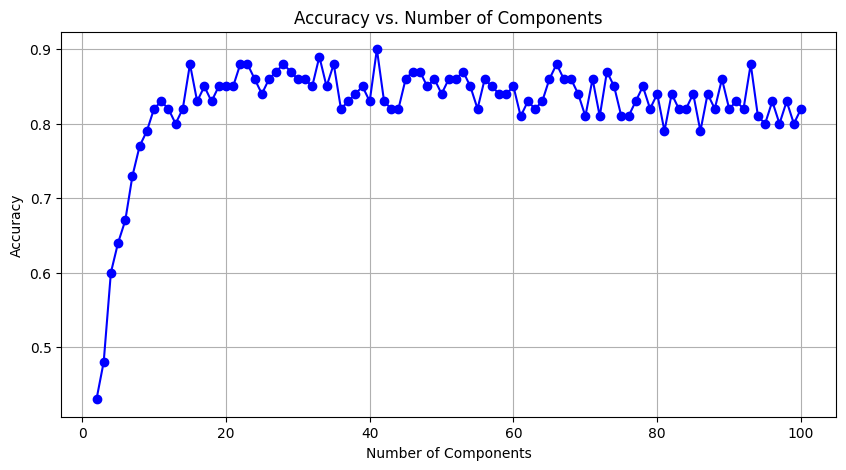

In [12]:
#plot the accuracy based on components.
#TODO

import matplotlib.pyplot as plt

# Plot accuracy vs. number of components
plt.figure(figsize=(10, 5))
plt.plot(pc_list, acc_list, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [13]:
#print the number of components that maximize the accuracy and the max accuracy
#TODO
max_accuracy = max(acc_list)
optimal_components = pc_list[acc_list.index(max_accuracy)]

print(f"Number of components that maximize accuracy: {optimal_components}")
print(f"Maximum accuracy: {100*max_accuracy:.2f}%")

Number of components that maximize accuracy: 41
Maximum accuracy: 90.00%
